# Introduzione a Pandas e Numpy

## Aggregati con Numpy

Numpy è un modulo di Python **ottimizzato** per la manipolazione di **grandi quantità di dati**. Aggiunge supporto a grandi matrici e array multidimensionali insieme a una vasta collezione di funzioni matematiche di alto livello per poter operare efficientemente su queste strutture dati.

Per approfondire https://numpy.org/

## Esempio di utilizzo di Numpy

Di seguito un esempio di come si possa disegnare visualizzare l'andamento di una funzione utilizzando `numpy` e `matplotlib`

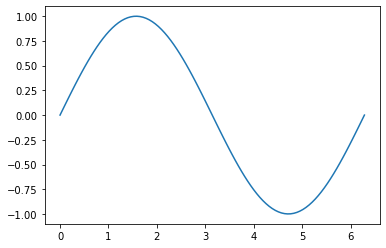

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Genera 100 punti tra 0 e 6.28 equidistanti
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

Possiamo utlizzare le due funzioni di Python `time` e `timeit` per valutare la differenza di performance tra l'implementazione di python e quella ottimizzata di Numpy.

Creiamo una lista di un milione di interi e calcoliamone la somma con i due metodi `sum` nativo di python e `np.sum` di Numpy

In [2]:
interi_1M = np.random.randint(100000, size=1000000)

print ('Utilizzo sum')
%time sum(interi_1M)
# %timeit sum(interi_1M)

print()

print ('Utilizzo np.sum')
%time np.sum(interi_1M)
# %timeit np.sum(interi_1M)

Utilizzo sum
CPU times: user 87.7 ms, sys: 0 ns, total: 87.7 ms
Wall time: 86.8 ms

Utilizzo np.sum
CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 1.11 ms


49957633465

In [3]:
%%html
<style>
table {float:left}
</style>

## Funzioni di aggregazione

Di seguito un breve elenco di alcune delle funzioni disponibili in Numpy


 **Function Name**  | **NaN-safe Version**  | **Description**             
--------------------|-----------------------|-----------------------------
 np.sum             | np.nansum             | Compute sum of elements     
 np.prod            | np.nanprod            | Compute product of elements 
 np.mean            | np.nanmean            | Compute mean of elements    
 np.std             | np.nanstd             | Compute standard deviation  
 np.var             | np.nanvar             | Compute variance            
 np.min             | np.nanmin             | Find minimum value          
 np.max             | np.nanmax             | Find maximum value          
 np.argmin          | np.nanargmin          | Find index of minimum value 
 np.argmax          | np.nanargmax          | Find index of maximum value 

# Pandas

E' una libreria software per Pyton per la manipolazione e l'analisi dei dati

Rilasciato sotto la licenza BSD

Il nome deriva dal termine "panel data"

Per una breve introduzione potete riferirvi a https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html



## Series

Sequenze 1-dimensionali di elementi omogenei

Ogni elemento è associato ad un indice (non necessariamente numerico)

Se l'indice non viene specificato ne viene creato uno automaticamente con un intero progressivo

Una serie può essere facilmente creata a partire da una lista o da un dizionario

Per approfondire: https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Serie senza indice esplicito creata a partire da una lista di float
s1 = pd.Series([2.8, 13.1, 14.2])
print(s1)

0     2.8
1    13.1
2    14.2
dtype: float64


In [6]:
# Serie di interi con un indice di stringhe esplicitamente creato
pd.Series([12, 15, 9], index=['lunedì', 'martedì', 'mercoledì'])

lunedì       12
martedì      15
mercoledì     9
dtype: int64

In [7]:
# Serie creata a partire da un dizionario
pd.Series({'Mauro':27, 'Luca':18, 'Anna':42})

Mauro    27
Luca     18
Anna     42
dtype: int64

Recupero di valori dalle serie

Possiamo leggere i valori inseriti e l'indice

In [8]:
s = pd.Series([12, 15, 9], index=['lunedì', 'martedì', 'mercoledì'])

# Stampa i valori
print(s.values)

# Stampa gli indici
print(s.index)

[12 15  9]
Index(['lunedì', 'martedì', 'mercoledì'], dtype='object')


L'indice implicito (numerico) è sempre presente, anche quando ne viene definito uno esplicitamente

Possiamo accedere ai singoli valori utilizzanto le due funzioni `loc` per gli indici espliciti e `iloc` per quelli impliciti

Per approfondire https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [9]:
s = pd.Series([12, 15, 9, 7 ,35], index=['lunedì', 'martedì', 'mercoledì','giovedì','venerdì'])

# Indice esplicito
print(s.loc['martedì'])

# Indice implicito
print(s.iloc[1])

15
15


In [10]:
# Si possono anche leggere più elementi contigui
print(s.loc['martedì':'giovedì']) # indice esplicito (elemento finale incluso)

martedì      15
mercoledì     9
giovedì       7
dtype: int64


In [11]:
print(s.iloc[1:3]) # # indice implicito (elemento finale escluso)

martedì      15
mercoledì     9
dtype: int64


# DataFrames

Sono delle tabelle in cui le colonne sono delle serie che condividono lo stesso indice

Possono essere creati a partire da un dizionario, da una lista di dizionari, da un array bidimensionale e molto altro

In [12]:
anni = pd.Series([35, 42, 29], index=['Mauro', 'Luca', 'Anna'])
altezza = pd.Series([178, 152, 180], index=['Mauro', 'Luca', 'Anna'])
peso = pd.Series([70, 65, 75], index=['Mauro', 'Luca', 'Anna'])
df = pd.DataFrame({'Anni':anni, 'Altezza':altezza,'Peso':peso})
print(df)

       Anni  Altezza  Peso
Mauro    35      178    70
Luca     42      152    65
Anna     29      180    75


In [13]:
# Senza indice esplicito ...
anni = pd.Series([35, 42, 29])
altezza = pd.Series([178, 152, 180])
peso = pd.Series([70, 65, 75])
dati_persone = pd.DataFrame({'Anni':anni, 'Altezza':altezza,'Peso':peso})
print(dati_persone)

   Anni  Altezza  Peso
0    35      178    70
1    42      152    65
2    29      180    75


Altri metodi molto più comodi per la creazione dei DataFrames sono la creazione di dataframe a partire da files:
- csv
- json
- html
- excel
- ... e molti altri

La lista completa la trovate su https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

# Missing values

Pandas offre molte funzioni per la **bonifica dei dati** sono utilissime in caso di importazione di dati "sporchi" o incompleti

- isnull()
- notnull()
- dropna()
- fillna()

Si possono eliminare i dati nulli, sostituire con un valore di default, con il valore precedente, con il successivo o con un valore calcolato.

Si possono eliminare intere colonne o righe con valori non accettabili.

Per approfondire: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

# Tabelle

Si può anche personalizzare la visualizzazione dei dati tabellari con i fogli di stile.

Per approfondire: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [14]:
dati_persone

,Anni,Altezza,Peso
0,35,178,70
1,42,152,65
2,29,180,75


In [15]:
s = df.style\
      .format('{:.0f}')\
      .set_table_styles([{
        'selector': '',
        'props':  'border-collapse: separate;'
      },{
        'selector': 'caption',
        'props': 'caption-side: bottom; font-size:1.3em; text-align: center'
      },{
        'selector': '.index_name',
        'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
      },{
        'selector': 'th:not(.index_name)',
        'props': 'background-color: #c2f0c2; color: black;'
      },{
        'selector': 'th.col_heading',
        'props': 'text-align: center;'
      },{
        'selector': 'th.col_heading.level0',
        'props': 'font-size: 1.5em;'
      },{
        'selector': 'td',
        'props': 'text-align: center; font-weight:bold;'
      },{
        'selector': '.true',
        'props': 'background-color: #00000;'
      },{
        'selector': '.false',
        'props': 'background-color: #ffffcc;'
      },{
        'selector': 'td:hover',
        'props': 'background-color: #ffcc80;'
      }])\
      .set_td_classes(pd.DataFrame([['true', 'false', 'true']], 
                                    index=df.index, columns=df.columns))\
      .set_caption("Raccolta dati persone")\
      .set_tooltips(pd.DataFrame([['Tooltip1', 'Tooltip2', 'Tooltip3'],['1','2','3'],['4','5','6']], 
                                    index=df.index, columns=df.columns),
                   css_class='pd-tt', props=
    'visibility: hidden; position: absolute; z-index: 1; border: 1px solid #000066;'
    'background-color: white; color: #000066; font-size: 0.8em;' 
    'transform: translate(0px, -24px); padding: 0.6em; border-radius: 0.5em;')

s

,Anni,Altezza,Peso
Mauro,35,178,70
Luca,42,152,65
Anna,29,180,75


# Chart Visualization

Una volta terminata l'analisi dei dati è molto semplice produrre dei grafici riepilogativi.

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

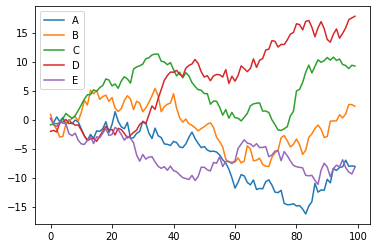

In [16]:
df = pd.DataFrame(np.random.randn(100, 5), columns=list('ABCDE'))
df=df.cumsum() # Return cumulative sum over a DataFrame or Series axis
df.plot()
plt.show()

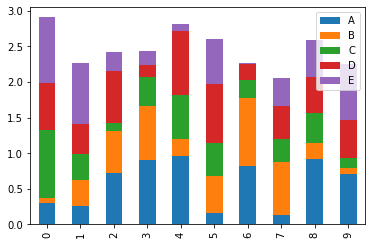

In [17]:
df = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))
df.plot.bar(stacked=True)
plt.show()

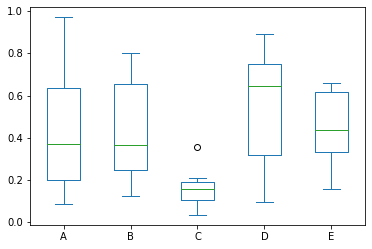

In [18]:
df = pd.DataFrame(np.random.rand(7, 5), columns=list('ABCDE'))
df.plot.box()
plt.show()

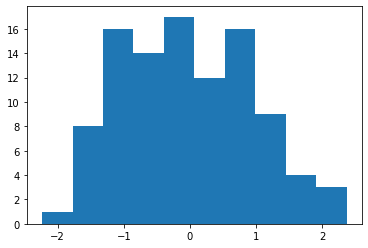

In [19]:
data = pd.Series(np.random.normal(size=100))
data.hist(grid=False)
plt.show()